# Testing Baseline (Global Model)

Importing the functions needed from the `mtl_patients` module:

In [4]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

import sys
pathname = "../code/"
if pathname not in sys.path:
    sys.path.append("../code/")

from mtl_patients import get_summaries, run_mortality_prediction_task

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Run summaries. Default (no parameters) assumes collection of data for first 24 hours and 12 hours of gap after that period to start predicting mortality.

In [5]:
pat_summ_by_cu_df, pat_summ_by_sapsiiq_df, vitals_labs_summ_df = get_summaries()

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Creating summaries
--------------------------------------------------------------------------------
    Loading data from MIMIC-Extract pipeline...
    Adding SAPS II score to static dataset...
    Adding mortality columns to static dataset...
    Merging dataframes to create X_full...
    Creating summary by careunit...
    Creating summary by SAPS II score quartile...
    Creating summary by vitals/labs...
    Done!


In [6]:
pat_summ_by_cu_df

,N,n,Class Imbalance,Age (Mean),Gender (Male)
Careunit,,,,,
CCU,4907,344,0.070,82.56,0.58
CSRU,6971,139,0.020,69.49,0.67
MICU,11403,1138,0.100,77.97,0.51
SICU,5187,409,0.079,72.65,0.52
TSICU,4245,291,0.069,67.20,0.61
Overall,32713,2321,0.071,74.61,0.57


In [4]:
pat_summ_by_sapsiiq_df

,N,n,Class Imbalance,Age (Mean),Gender (Male),SAPS II (Min),SAPS II (Mean),SAPS II (Max)
SAPS II Quartile,,,,,,,,
0,7099,62,0.009,45.69,0.61,0,16.61,22
1,10033,259,0.026,68.94,0.58,23,27.74,32
2,8127,552,0.068,86.52,0.55,33,36.72,41
3,7454,1448,0.194,96.80,0.54,42,51.42,118
Overall,32713,2321,0.071,74.61,0.57,0,32.95,118


In [5]:
vitals_labs_summ_df

,min,avg,max,std,N,pres.
variable,,,,,,
anion gap,5.00,13.62,50.00,3.84,178506,0.0832
bicarbonate,0.00,24.32,53.00,4.68,187223,0.0873
blood urea nitrogen,0.00,26.07,250.00,21.63,189120,0.0882
chloride,50.00,105.19,175.00,6.26,205674,0.0959
creatinine,0.10,1.39,46.60,1.48,189944,0.0886
diastolic blood pressure,0.00,60.95,307.00,14.08,1866709,0.8703
fraction inspired oxygen,0.21,0.53,1.00,0.19,95643,0.0446
glascow coma scale total,3.00,12.59,15.00,3.50,367332,0.1713
glucose,33.00,140.03,1591.00,56.29,502487,0.2343


Run the mortality prediction task using the global model. Default (no parameters) assumes collection of data for first 24 hours and 12 hours of gap after that period to start predicting mortality.

In [7]:
pd.options.display.max_rows = 9999
metrics_df = run_mortality_prediction_task()

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Preparing the data
--------------------------------------------------------------------------------
    Loading data from MIMIC-Extract pipeline...
    Adding SAPS II score to static dataset...
    Adding mortality columns to static dataset...
    Discretizing X...
        X.shape: (2200954, 33), X.subject_id.nunique(): 34472
        X_discrete.shape: (2200954, 225), X_discrete.subject_id.nunique(): 34472
    Keep only X_discrete[X_discrete.hours_in < 24]...
        New X_discrete.shape: (808539, 223), new X_discrete.subject_id.nunique(): 34472
    Padding patients with less than 24 hours of data...
    Merging dataframes to create X_full...
    Mortality per careunit...
        MICU: 1138 out of 11403
        SICU: 409 out of 5187
        CCU: 344 out of 4907
        CSRU: 139 out of 6971
        TSICU: 291 out of 4245
    Final shape of X: (32713, 24, 232)
    Number of positive samples: 2321
    Done!
+

2023-03-31 15:12:34.601259: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/30
229/229 [==============================] - 3s 12ms/step - loss: 0.3924 - accuracy: 0.9268 - val_loss: 0.2854 - val_accuracy: 0.9291
Epoch 2/30
229/229 [==============================] - 3s 11ms/step - loss: 0.2627 - accuracy: 0.9290 - val_loss: 0.2531 - val_accuracy: 0.9291
Epoch 3/30
229/229 [==============================] - 3s 11ms/step - loss: 0.2367 - accuracy: 0.9290 - val_loss: 0.2317 - val_accuracy: 0.9291
Epoch 4/30
229/229 [==============================] - 3s 11ms/step - loss: 0.2202 - accuracy: 0.9290 - val_loss: 0.2205 - val_accuracy: 0.9291
Epoch 5/30
229/229 [==============================] - 3s 11ms/step - loss: 0.2109 - accuracy: 0.9290 - val_loss: 0.2139 - val_accuracy: 0.9291
Epoch 6/30
229/229 [==============================] - 3s 11ms/step - loss: 0.2047 - accuracy: 0.9291 - val_loss: 0.2097 - val_accuracy: 0.9291
Epoch 7/30
229/229 [==============================] - 3s 11ms/step - loss: 0.1991 - accuracy: 0.9294 - val_loss: 0.2059 - val_accuracy: 0.9297

First run.

In [4]:
metrics_df

,AUC
CCU,0.866500
CSRU,0.889536
MICU,0.828538
SICU,0.853458
TSICU,0.866083
Macro,0.860823
Micro,0.863960


Second run.

In [6]:
metrics_df

,AUC
CCU,0.866500
CSRU,0.889536
MICU,0.828538
SICU,0.853458
TSICU,0.866083
Macro,0.860823
Micro,0.863960


They are the same!

Let's try to figure out PPV and Specificity

In [12]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import random
from keras.callbacks import EarlyStopping
from keras.layers import Input, Dense, LSTM, RepeatVector
from keras.models import Model, Sequential
from keras.optimizers import Adam
from sklearn.metrics import roc_auc_score
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

In [8]:
model_type='global'
cutoff_hours=24
gap_hours=12
save_to_folder='../data/'
cohort_criteria_to_select='careunits'
train_val_random_seed=0
cohort_unsupervised_filename='../data/unsupervised_clusters.npy'
lstm_layer_size=16
epochs=30
learning_rate=0.0001
use_cohort_inv_freq_weights=False

In [18]:
from mtl_patients import set_global_determinism, prepare_data, stratified_split, create_single_task_learning_model

In [16]:
SEED = 0

set_global_determinism(seed=SEED)

# create folders to store models and results
for folder in ['results', 'models']:
    if not os.path.exists(os.path.join(save_to_folder, folder)):
        os.makedirs(os.path.join(save_to_folder, folder))

X, Y, careunits, sapsii_quartile, subject_ids = prepare_data(cutoff_hours=cutoff_hours, gap_hours=gap_hours)
Y = Y.astype(int) # Y is originally a boolean

print('+' * 80, flush=True)
print('Running the Mortality Prediction Task', flush=True)
print('-' * 80, flush=True)

# fetch right cohort criteria
if cohort_criteria_to_select == 'careunits':
    cohort_criteria = careunits
elif cohort_criteria_to_select == 'sapsii_quartile':
    cohort_criteria = sapsii_quartile
elif cohort_criteria_to_select == 'unsupervised':
    cohort_criteria = np.load(f"{cohort_unsupervised_filename}")

# Do train/validation/test split using `cohort_criteria` as the cohort classifier
print('    Splitting data into train/validation/test sets...', flush=True)
X_train, X_val, X_test, y_train, y_val, y_test, cohorts_train, cohorts_val, cohorts_test = \
    stratified_split(X, Y, cohort_criteria, train_val_random_seed=SEED)

# one task by distinct cohort
tasks = np.unique(cohorts_train)

# calculate number of samples per cohort and its reciprocal
# (to be used in sample weight calculation)
print('    Calculating number of training samples in cohort...', flush=True)
task_weights = {}
for cohort in tasks:
    num_samples_in_cohort = len(np.where(cohorts_train == cohort)[0])
    print(f"        # of patients in cohort {cohort} is {str(num_samples_in_cohort)}")
    task_weights[cohort] = len(X_train) / num_samples_in_cohort

sample_weight = None
if use_cohort_inv_freq_weights:
    # calculate sample weight as the cohort's inverse frequency corresponding to each sample
    sample_weight = np.array([task_weights[cohort] for cohort in cohorts_train])

model_filename = f"{save_to_folder}models/model_{cutoff_hours}+{gap_hours}_{cohort_criteria_to_select}"
results_filename = f'{save_to_folder}results/model_{cutoff_hours}+{gap_hours}_{cohort_criteria_to_select}.h5'

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Preparing the data
--------------------------------------------------------------------------------
    Loading data from MIMIC-Extract pipeline...
    Adding SAPS II score to static dataset...
    Adding mortality columns to static dataset...
    Discretizing X...
        X.shape: (2200954, 33), X.subject_id.nunique(): 34472
        X_discrete.shape: (2200954, 225), X_discrete.subject_id.nunique(): 34472
    Keep only X_discrete[X_discrete.hours_in < 24]...
        New X_discrete.shape: (808539, 223), new X_discrete.subject_id.nunique(): 34472
    Padding patients with less than 24 hours of data...
    Merging dataframes to create X_full...
    Mortality per careunit...
        MICU: 1138 out of 11403
        SICU: 409 out of 5187
        CCU: 344 out of 4907
        CSRU: 139 out of 6971
        TSICU: 291 out of 4245
    Final shape of X: (32713, 24, 232)
    Number of positive samples: 2321
    Done!
+

In [19]:
print('    ' + '~' * 76)
print(f"    Training '{model_type}' model...")

model = create_single_task_learning_model(lstm_layer_size=lstm_layer_size, input_dims=X_train.shape[1:],
                                          output_dims=1, learning_rate=learning_rate)
print(model.summary())

early_stopping = EarlyStopping(monitor='val_loss', patience=4)

model.fit(X_train, y_train, epochs=epochs, batch_size=100, sample_weight=sample_weight,
          callbacks=[early_stopping], validation_data=(X_val, y_val))
model.save(model_filename)

print('    ' + '~' * 76)
print(f"    Predicting using '{model_type}' model...", flush=True)

    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    Training 'global' model...
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 16)                15936     
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 15,953
Trainable params: 15,953
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
229/229 [==============================] - 3s 12ms/step - loss: 0.3924 - accuracy: 0.9268 - val_loss: 0.2854 - val_accuracy: 0.9291
Epoch 2/30
229/229 [==============================] - 3s 11ms/step - loss: 0.2627 - accuracy: 0.9290 - val_loss: 0.2531 - val_accuracy: 0.9291
Epoch 3/30
229/229 [=======================

Let's try predicting using `predict` (author's code):

In [103]:
y_scores = np.squeeze(model.predict(X_test))

205/205 [==============================] - 1s 2ms/step


In [104]:
y_scores

array([8.3195623e-03, 6.6656515e-02, 5.9941933e-03, ..., 2.0241662e-04,
       2.2997111e-02, 1.5372839e-08], dtype=float32)

In [106]:
y_pred = (y_scores > 0.5).astype("int32")

In [107]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [108]:
np.sum(y_pred)

125

In [43]:
roc_auc_score(y_test, y_scores)

0.8639600149752397

In [69]:
from sklearn.metrics import precision_score, confusion_matrix

precision_score(y_test, y_pred, pos_label=0)

0.9400124649423497

In [77]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[6033,   46],
       [ 385,   79]])

In [81]:
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
cm

array([[  79,  385],
       [  46, 6033]])

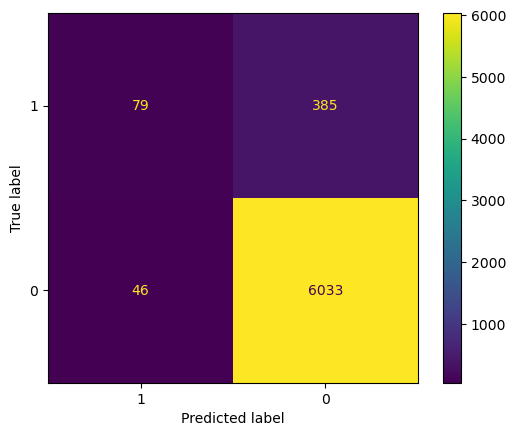

In [86]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 0])
disp.plot()

*PPV (Positive Prediction Value)* which is same as *precision* is defined as $\dfrac{\text{TP}}{\text{TP}+\text{FP}} = \dfrac{79}{79+46}$.

In [88]:
cm[0,0] / (cm[0,0] + cm[1,0])

0.632

*Specificity* is defined as $\dfrac{\text{TN}}{\text{TN}+\text{FP}} = \dfrac{6033}{6033+46}$.

In [89]:
cm[1,1] / (cm[0,1] + cm[1,1])

0.9400124649423497

In [55]:
y_pred = np.squeeze(y_pred)

In [66]:
precision_score(y_test, y_pred, average=None)

array([0.94001246, 0.632     ])

In [53]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [56]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [90]:
y_scores

array([[8.3195623e-03],
       [6.6656515e-02],
       [5.9941933e-03],
       ...,
       [2.0241662e-04],
       [2.2997111e-02],
       [1.5372839e-08]], dtype=float32)

In [1]:
metrics_df = run_mortality_prediction_task()

NameError: name 'run_mortality_prediction_task' is not defined

In [92]:
metrics_df

,AUC,PPV,Specificity
CCU,0.866500,0.666667,0.993457
CSRU,0.889536,0.333333,0.997141
MICU,0.828538,0.661765,0.988731
SICU,0.853458,0.619048,0.991407
TSICU,0.866083,0.583333,0.993679
Macro,0.860823,0.572829,0.992883
Micro,0.863960,0.632000,0.992433
